In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import trompy as tp

%run "..//src//vgp_helper_fx"

In [255]:
DATA_FOLDER = "D:\VGP"

#casein session 1
animal="VGP504"
day="031"
day_meta='C1'
date="20230412"



s2p_folder = os.path.join(DATA_FOLDER,
                          "2P",
                          "proc_s2p\\"
                          "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                          .format(animal, day, date))

# to get event file in single folder
# rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.4.xls',sheetname='analysis')
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Metafile_VGP2.4.xls',sheetname='analysis')
folder= "D:\\VGP\\Bonsai\\"

for row in rows: 
    if row[0]== animal and row[3] == day_meta: 
        events_file=folder+row[6]
C1 = assemble_data(s2p_folder,events_file,animal="VGP118", diet="NR", solution="Casein")


# Casein session 2 

animal="VGP504"
day="037"
day_meta='C2'
date="20230418"
s2p_folder = os.path.join(DATA_FOLDER,
                          "2P",
                          "proc_s2p\\"
                          "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                          .format(animal, day, date))

# to get event file in single folder
# rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.4.xls',sheetname='analysis')
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Metafile_VGP2.4.xls',sheetname='analysis')
folder= "D:\\VGP\\Bonsai\\"

for row in rows: 
    if row[0]== animal and row[3] == day_meta: 
        events_file=folder+row[6]
C2 = assemble_data(s2p_folder,events_file,animal="VGP118", diet="NR", solution="Casein")


# Casein session 3 

animal="VGP504"
day="039"
day_meta='C3'
date="20230420"
s2p_folder = os.path.join(DATA_FOLDER,
                          "2P",
                          "proc_s2p\\"
                          "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                          .format(animal, day, date))

# to get event file in single folder
# rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.4.xls',sheetname='analysis')
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Metafile_VGP2.4.xls',sheetname='analysis')
folder= "D:\\VGP\\Bonsai\\"

for row in rows: 
    if row[0]== animal and row[3] == day_meta: 
        events_file=folder+row[6]
C3 = assemble_data(s2p_folder,events_file,animal="VGP118", diet="NR", solution="Casein")

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [256]:
animal="VGP504"
day="030"
day_meta='M1'
date="20230411"



s2p_folder = os.path.join(DATA_FOLDER,
                          "2P",
                          "proc_s2p\\"
                          "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                          .format(animal, day, date))

# to get event file in single folder
# rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.4.xls',sheetname='analysis')
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Metafile_VGP2.4.xls',sheetname='analysis')
folder= "D:\\VGP\\Bonsai\\"

for row in rows: 
    if row[0]== animal and row[3] == day_meta: 
        events_file=folder+row[6]
M1 = assemble_data(s2p_folder,events_file,animal="VGP118", diet="NR", solution="Casein")

#Malt 2

animal="VGP504"
day="036"
day_meta='M2'
date="20230417"



s2p_folder = os.path.join(DATA_FOLDER,
                          "2P",
                          "proc_s2p\\"
                          "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                          .format(animal, day, date))

# to get event file in single folder
# rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.4.xls',sheetname='analysis')
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Metafile_VGP2.4.xls',sheetname='analysis')
folder= "D:\\VGP\\Bonsai\\"

for row in rows: 
    if row[0]== animal and row[3] == day_meta: 
        events_file=folder+row[6]
M2 = assemble_data(s2p_folder,events_file,animal="VGP118", diet="NR", solution="Casein")

# Malt 3

animal="VGP504"
day="043"
day_meta='M3'
date="20230424"



s2p_folder = os.path.join(DATA_FOLDER,
                          "2P",
                          "proc_s2p\\"
                          "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                          .format(animal, day, date))

# to get event file in single folder
# rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.4.xls',sheetname='analysis')
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Metafile_VGP2.4.xls',sheetname='analysis')
folder= "D:\\VGP\\Bonsai\\"

for row in rows: 
    if row[0]== animal and row[3] == day_meta: 
        events_file=folder+row[6]
M3 = assemble_data(s2p_folder,events_file,animal="VGP118", diet="NR", solution="Casein")

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [257]:
print(len(M3['pump_responsive']))
M3['df_responsive']

42


,responsive,activated,inhibited
pump_all,12,11,1
lick_all,17,15,2
pump_only,2,1,1
lick_only,7,5,2
both,10,10,0
neither,23,26,39


In [258]:
print(len(C1['pump_responsive']))
C1['df_responsive']

55


,responsive,activated,inhibited
pump_all,6,6,0
lick_all,19,16,3
pump_only,3,3,0
lick_only,16,13,3
both,3,3,0
neither,33,36,52


In [259]:
print(len(C2['pump_responsive']))
C2['df_responsive']

46


,responsive,activated,inhibited
pump_all,2,2,0
lick_all,18,15,3
pump_only,2,2,0
lick_only,18,15,3
both,0,0,0
neither,26,29,43


In [260]:
print(len(C3['pump_responsive']))
C3['df_responsive']

47


,responsive,activated,inhibited
pump_all,8,4,4
lick_all,12,11,1
pump_only,7,4,4
lick_only,11,11,1
both,1,0,0
neither,28,32,42


Text(402.575, 0.5, 'Delta F / F')

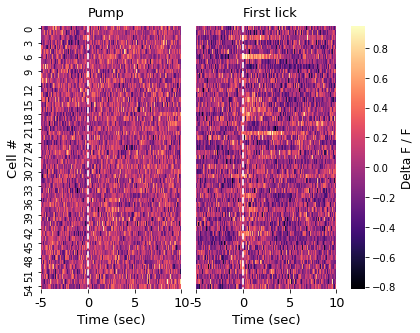

In [261]:
# heatplot to show pump and lick 

f, ax = plt.subplots(figsize=(6,5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.15, left=0.1, right=0.85)



y1 = np.mean(C1["pump_snips_all"], axis=1)
y2 = np.mean(C1["lick_snips_all"], axis=1)

sns.heatmap(y1, ax = ax[0],cbar=False,cmap="magma")
sns.heatmap(y2, ax = ax[1], cbar_ax=ax[2],cmap="magma")

ax[0].text(50,-2, "Pump", size=13)
ax[0].vlines([50],0,77, color="white", linestyle="--",lw=1.7)

ax[1].text(50,-2, "First lick", size=13)
ax[1].vlines([50],0,77, color="white", linestyle="--",lw=1.7)

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)

ax[0].set_ylabel("Cell #", size=13)
# ax[0].set_yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)
ax[1].set_yticks([])

ax[2].set_ylabel("Delta F / F", size=12)


# f.savefig("..//output//heatmap_allcells.png")

C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


[Text(0, -0.6, '-0.6'),
 Text(0, -0.4, '-0.4'),
 Text(0, -0.2, '-0.2'),
 Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.6, '0.6')]

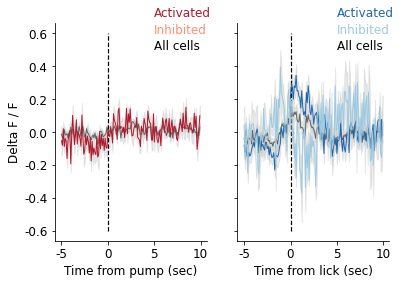

In [262]:
# shaded error plots to show activation Casein 1

f, ax = plt.subplots(ncols=2, sharey=True)

y1 = np.mean(C1["pump_snips_all"], axis=1)
y1_resp = np.mean(C1["pump_snips_all"][np.where(C1["pump_responsive"] == 1)], axis=1)
y2_resp = np.mean(C1["pump_snips_all"][np.where(C1["pump_responsive"] == -1)], axis=1)

# print('all cells',len(C3["pump_snips_all"]))
# print('pump act cells',len ((C3["pump_snips_all"][np.where(C2["pump_responsive"] == 1)])))
# print('pump inhib cells',len ((C2["pump_snips_all"][np.where(C2["pump_responsive"] == -1)])))

ax[0].text(100, 0.5, "All cells", size=12)
ax[0].text(100, 0.7, "Activated", color="#b2182b",size=12)
ax[0].text(100, 0.6, "Inhibited", color="#fc9272",size=12)

ax[0].vlines([50],-0.6,0.6, color="black", linestyle="--", linewidth=1.2)

tp.shadedError(ax[0], y1, linecolor="#636363")
tp.shadedError(ax[0], y1_resp, linecolor="#b2182b")
tp.shadedError(ax[0], y2_resp, linecolor="#fc9272")


y2 = np.mean(C1["lick_snips_all"], axis=1)
y3_resp = np.mean(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 1)], axis=1)
y4_resp = np.mean(C1["lick_snips_all"][np.where(C1["lick_responsive"] == -1)], axis=1)

# print('all cells',len(C2["lick_snips_all"]))
# print('lick act cells',len ((C2["lick_snips_all"][np.where(C2["lick_responsive"] == 1)])))
# print('lick inhib cells',len ((C2["lick_snips_all"][np.where(C2["lick_responsive"] == -1)])))

tp.shadedError(ax[1], y2, linecolor="#636363")
tp.shadedError(ax[1], y3_resp, linecolor="#2166ac")
tp.shadedError(ax[1], y4_resp, linecolor="#9ecae1")


ax[1].text(100, 0.5, "All cells", size=12)
ax[1].text(100, 0.7, "Activated", color="#2166ac",size=12)
ax[1].text(100, 0.6, "Inhibited", color="#9ecae1",size=12)

ax[1].vlines([50],-0.6,0.6, color="black", linestyle="--",linewidth=1.2)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=12)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    
ax[0].set_xlabel("Time from pump (sec)", size=12)
ax[1].set_xlabel("Time from lick (sec)", size=12)

ax[0].set_ylabel("Delta F / F", size=12)
ax[0].set_yticks([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6])
ax[1].set_yticks([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6])
ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6], size=12)

# f.savefig("..//output//shadederror.png")

### Lick activated cells Casein session 1, 2 and 3 

[Text(0, -0.6, '-0.6'),
 Text(0, -0.4, '-0.4'),
 Text(0, -0.2, '-0.2'),
 Text(0, 0.0, '0.0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.6, '0.6')]

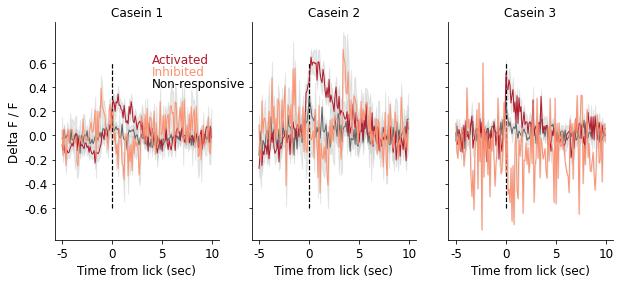

In [263]:
# shaded error plots to show activation Casein 1

f, ax = plt.subplots(figsize=(10,4),ncols=3, sharey=True)

y1 = np.mean(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 0)], axis=0)
y1_act = np.mean(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 1)], axis=1)
y1_inh = np.mean(C1["lick_snips_all"][np.where(C1["lick_responsive"] == -1)], axis=1)

# print('all cells',len(C3["pump_snips_all"]))
# print('pump act cells',len ((C3["pump_snips_all"][np.where(C2["pump_responsive"] == 1)])))
# print('pump inhib cells',len ((C2["pump_snips_all"][np.where(C2["pump_responsive"] == -1)])))

ax[0].text(90, 0.4, "Non-responsive", size=12)
ax[0].text(90, 0.6, "Activated", color="#b2182b",size=12)
ax[0].text(90, 0.5, "Inhibited", color="#fc9272",size=12)

ax[0].vlines([50],-0.6,0.6, color="black", linestyle="--", linewidth=1.2)

tp.shadedError(ax[0], y1, linecolor="#636363")
tp.shadedError(ax[0], y1_act, linecolor="#b2182b")
tp.shadedError(ax[0], y1_inh, linecolor="#fc9272")


y2 = np.mean(C2["lick_snips_all"][np.where(C2["lick_responsive"] == 0)], axis=0)
y2_act = np.mean(C2["lick_snips_all"][np.where(C2["lick_responsive"] == 1)], axis=1)
y2_inh = np.mean(C2["lick_snips_all"][np.where(C2["lick_responsive"] == -1)], axis=1)

tp.shadedError(ax[1], y2, linecolor="#636363")
tp.shadedError(ax[1], y2_act, linecolor="#b2182b")
tp.shadedError(ax[1], y2_inh, linecolor="#fc9272")

ax[1].vlines([50],-0.6,0.6, color="black", linestyle="--",linewidth=1.2)

y3 = np.mean(C3["lick_snips_all"][np.where(C3["lick_responsive"] == 0)], axis=0)
y3_act = np.mean(C3["lick_snips_all"][np.where(C3["lick_responsive"] == 1)], axis=1)
y3_inh = np.mean(C3["lick_snips_all"][np.where(C3["lick_responsive"] == -1)], axis=1)

tp.shadedError(ax[2], y3, linecolor="#636363")
tp.shadedError(ax[2], y3_act, linecolor="#b2182b")
tp.shadedError(ax[2], y3_inh, linecolor="#fc9272")

ax[2].vlines([50],-0.6,0.6, color="black", linestyle="--",linewidth=1.2)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=12)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    
ax[0].set_xlabel("Time from lick (sec)", size=12)
ax[1].set_xlabel("Time from lick (sec)", size=12)
ax[2].set_xlabel("Time from lick (sec)", size=12)

ax[0].set_title("Casein 1", size=12)
ax[1].set_title("Casein 2", size=12)
ax[2].set_title("Casein 3", size=12)


ax[0].set_ylabel("Delta F / F", size=12)
ax[0].set_yticks([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6])
ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6], size=12)

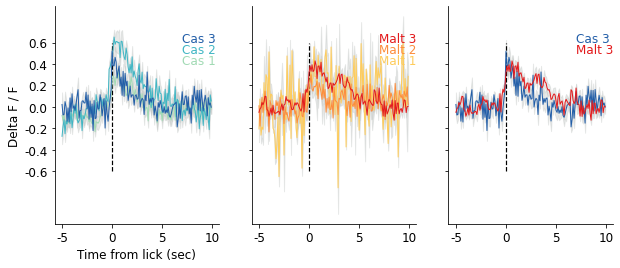

In [265]:
f, ax = plt.subplots(figsize=(10,4),ncols=3, sharey=True)

y1 = np.mean(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 1)], axis=1)
y2 = np.mean(C2["lick_snips_all"][np.where(C2["lick_responsive"] == 1)], axis=1)
y3 = np.mean(C3["lick_snips_all"][np.where(C3["lick_responsive"] == 1)], axis=1)

# print('all cells',len(C3["pump_snips_all"]))
# print('pump act cells',len ((C3["pump_snips_all"][np.where(C2["pump_responsive"] == 1)])))
# print('pump inhib cells',len ((C2["pump_snips_all"][np.where(C2["pump_responsive"] == -1)])))

ax[0].text(120, 0.4, "Cas 1",color='#a1dab4', size=12)
ax[0].text(120, 0.5, "Cas 2", color="#41b6c4",size=12)
ax[0].text(120, 0.6, "Cas 3", color="#225ea8",size=12)

ax[0].vlines([50],-0.6,0.6, color="black", linestyle="--", linewidth=1.2)

tp.shadedError(ax[0], y1, linecolor="#a1dab4")
tp.shadedError(ax[0], y2, linecolor="#41b6c4")
tp.shadedError(ax[0], y3, linecolor="#225ea8")


z1 = np.mean(M1["lick_snips_all"][np.where(M1["lick_responsive"] == 1)], axis=1)
z2 = np.mean(M2["lick_snips_all"][np.where(M2["lick_responsive"] == 1)], axis=1)
z3 = np.mean(M3["lick_snips_all"][np.where(M3["lick_responsive"] == 1)], axis=1)

# print('all cells',len(C3["pump_snips_all"]))
# print('pump act cells',len ((C3["pump_snips_all"][np.where(C2["pump_responsive"] == 1)])))
# print('pump inhib cells',len ((C2["pump_snips_all"][np.where(C2["pump_responsive"] == -1)])))

ax[1].text(120, 0.4, "Malt 1",color='#fecc5c', size=12)
ax[1].text(120, 0.5, "Malt 2", color="#fd8d3c",size=12)
ax[1].text(120, 0.6, "Malt 3", color="#e31a1c",size=12)

ax[1].vlines([50],-0.6,0.6, color="black", linestyle="--", linewidth=1.2)

tp.shadedError(ax[1], z1, linecolor="#fecc5c")
tp.shadedError(ax[1], z2, linecolor="#fd8d3c")
tp.shadedError(ax[1], z3, linecolor="#e31a1c")


tp.shadedError(ax[2], y3, linecolor='#225ea8')
tp.shadedError(ax[2], z3, linecolor="#e31a1c")
ax[2].vlines([50],-0.6,0.6, color="black", linestyle="--", linewidth=1.2)

ax[2].text(120, 0.5, "Malt 3", color="#e31a1c",size=12)
ax[2].text(120, 0.6, "Cas 3", color="#225ea8",size=12)






for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=12)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)

ax[0].set_xlabel("Time from lick (sec)", size=12)
ax[0].set_ylabel("Delta F / F", size=12)
ax[0].set_yticks([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6])
ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6], size=12)


f.savefig("..//output//NR_cas_504.png")



In [177]:
# print('Total number of cells',len(C1['lick_responsive']))

# C1["df_responsive"].activated


In [178]:
# C1["df_responsive"].activated[2:6]

Text(0.5, 1.0, 'Session 3')

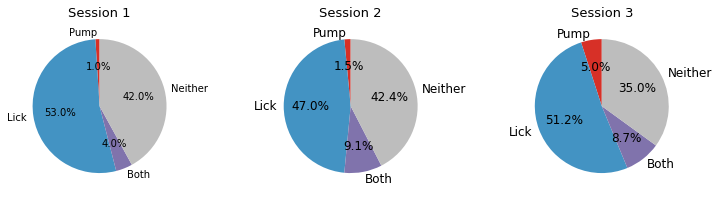

In [179]:
# make pie chart showing activated cells

pie_colors = ['#d73027','#4393c3','#8073ac','#bdbdbd']
labels = ['Pump','Lick','Both','Neither']

f, [ax1, ax2, ax3] = plt.subplots(figsize=(12,4), ncols=3, gridspec_kw={"wspace":0.5})

ax1.pie(C1["df_responsive"].activated[2:6], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(C2["df_responsive"].activated[2:6], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 12})

ax3.pie(C3["df_responsive"].activated[2:6], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 12})

ax1.set_title("Session 1", size=13)
ax2.set_title("Session 2", size=13)
ax3.set_title("Session 3", size=13)

# f.savefig("..//output//pies_activated.png")

In [141]:
plt.pie?

Signature:
plt.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=None,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
the fractional area directly and the array will not be normalized. The
resulting pie will have an empty wedge of size ``1 - sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A se

In [117]:
np.shape(C1["pump_snips_all"])
np.shape(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 1)])

(5, 29, 150)

In [11]:
s = assemble_data(s2p_folder,events_file)

In [12]:
get_number_cells

<function __main__.get_number_cells(s2p_folder)>

In [13]:
s = assemble_data(s2p_folder,events_file)
np.shape(s)

()

In [14]:
s.keys()

dict_keys(['animal', 'diet', 'solution', 'raw_F', 'neu_F', 'iscell', 'pump_snips_all', 'pump_responsive', 'lick_snips_all', 'lick_responsive', 'df_responsive'])

In [15]:
np.shape(s["lick_snips_all"])

(23, 16, 150)

In [16]:
l = s["lick_snips_all"][np.where(s["lick_responsive"] == 1)]
p = s["pump_snips_all"][np.where(s["pump_responsive"] == -1)]
l.shape

(7, 16, 150)

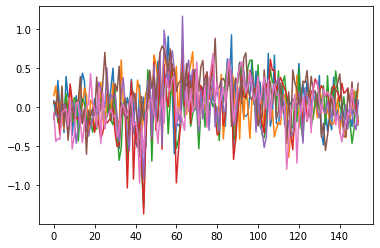

In [17]:
plt.plot(np.mean(l, axis=1).T);

NameError: name 'cas' is not defined

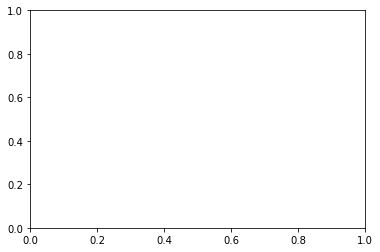

In [18]:
import trompy as tp

f, ax = plt.subplots()

for sol in [cas, malt]:
    s = sol
    l = s["lick_snips_all"][np.where(s["lick_responsive"] == 1)]
    p = s["pump_snips_all"][np.where(s["pump_responsive"] == -1)]

    y = np.mean(l, axis=1)

    tp.shadedError(ax, y)

In [ ]:
import seaborn as sns

f, ax = plt.subplots(ncols=2)

for sol, axis in zip([cas, malt], ax):
    y = np.mean(sol["lick_snips_all"], axis=1)
    sns.heatmap(y, ax = axis)

In [ ]:
# pie chart for activated cells 
sizes_a = [n_pump_a_only, n_lick_a_only, n_both_a, n_non_a]
sizes_i = [n_pump_i_only, n_lick_i_only, n_both_i, n_non_i]
sizes_r = [n_pump_r, n_lick_r, n_both_r, n_non_r]
labels = 'Pump','Lick','Both','Neither'

f1, ax1 = plt.subplots()
ax1.pie(sizes_a, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=['green','red','yellow','dimgrey'])

In [ ]:
def get_ncells_overlap(cond1, cond2):
    
    n_both = sum(np.logical_and(cond1, cond2))
    n_neither = sum(~np.logical_or(cond1, cond2))
    n_cond1 = int(sum(cond1) - n_both)
    n_cond2 = int(sum(cond2) - n_both)

    return (n_cond1, n_cond2, n_both, n_neither)

s = cas

# responsive cells
pump_r = abs(s["pump_responsive"])
lick_r = abs(s["lick_responsive"])

# activated cells
pump_a = s["pump_responsive"] == 1
lick_a = s["lick_responsive"] == 1

# inhibited cells
pump_i = s["pump_responsive"] == -1
lick_i = s["lick_responsive"] == -1

import pandas as pd
return pd.DataFrame([get_ncells_overlap(pump_r, lick_r),
                   get_ncells_overlap(pump_a, lick_a),
                   get_ncells_overlap(pump_i, lick_i)],
                  columns=["pump", "lick", "both", "neither"],
                  index=["responsive", "activated", "inhibited"]).T

pie_colors = ['green','red','yellow','dimgrey']
labels = 'Pump','Lick','Both','Neither'


f, [ax1, ax2, ax3]  = plt.subplots(ncols=3)

ax1.pie(get_ncells_overlap(pump_r, lick_r), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);

ax2.pie(get_ncells_overlap(pump_a, lick_a), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);

ax3.pie(get_ncells_overlap(pump_i, lick_i), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);



In [ ]:
df

In [ ]:
f, ax = plt.subplots()

pie_colors = ['green','red','yellow','dimgrey']

pump_r = abs(cas["pump_responsive"])
lick_r = abs(cas["lick_responsive"])
cas_bars = get_ncells_overlap(pump_r, lick_r)

pump_r = abs(malt["pump_responsive"])
lick_r = abs(malt["lick_responsive"])
malt_bars = get_ncells_overlap(pump_r, lick_r)

bottom=[0, 0]
for i, bars_c, bars_m in zip(range(4), cas_bars, malt_bars):
    ax.bar(1, bars_c, bottom=bottom[0], color=pie_colors[i])
    ax.bar(2, bars_m, bottom=bottom[1], color=pie_colors[i])
    
    bottom[0] += bars_c
    bottom[1] += bars_m
    
    print(i, bottom)
    

In [ ]:
pump_a = s["pump_responsive"] == 1
pump_a

In [ ]:
np.logical_or(c3, c4)
~np.logical_or(c1, c2)

In [ ]:
n_non_r + n_both_r + n_lickonly_r + n_pumponly_r

In [ ]:
int(sum(abs(s["lick_responsive"]) * abs(s["pump_responsive"])))


In [ ]:
pie_colors = ['green','red','yellow','dimgrey']
labels = 'Pump','Lick','Both','Neither'

sizes_r = [n_pump_r, n_lick_r, n_both_r, n_neither_r]
sizes_a = [n_pump_a, n_lick_a, n_both_a, n_neither_a]
sizes_i = [n_pump_i, n_lick_i, n_both_i, n_neither_i]

f, [ax1, ax2, ax3]  = plt.subplots(ncols=3)
ax1.pie(sizes_r, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);


In [ ]:
np.count_nonzero(s["lick_responsive"] == 1)

In [ ]:
cas = assemble_data(s2p_folder,events_file)
malt = assemble_data(s2p_folder,events_file)

In [ ]:
METAFILE = "..\\data\\"